<a href="https://www.kaggle.com/code/karinasaunders/a-man-called-ove-goodreads-reviews?scriptVersionId=121153291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# download packages 

import numpy as np # linear algebra
import pandas as pd # data processing
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.goodreads.com/book/show/18774964-a-man-called-ove/reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
reviews = []
for row in soup.find_all(class_ = 'ReviewCard'):
    rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
    review_text = row.find(class_ = 'ReviewText').text.strip()
    date = row.find(class_ ='Text Text__body3').text
    username = row.find(class_ = 'ReviewerProfile__name').text.strip()
    likes = row.find(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
    book = {
        "Text": review_text,
        "Rating": rating,
        "Date" : date,
        "Username": username,
        "Likes": likes
    }
    reviews.append(book)

In [4]:
ove_df = pd.DataFrame(reviews)

ove_df['Rating'] = ove_df['Rating'].str[7]
ove_df['Review Likes'] = ove_df['Likes'].str.rstrip(' likes')
ove_df = ove_df.drop(columns='Likes')

In [5]:
display(ove_df)

,Text,Rating,Date,Username,Review Likes
0,Update: I had planned to leave this post as it...,4,"October 1, 2016",Emily May,"3,538"
1,"""Death is a strange thing. People live their w...",5,"January 23, 2015",Lynda,"1,933"
2,Argh! It’s hard not to start this review with ...,2,"June 18, 2016",Debbie,962
3,Shout out to this absolutely fabulous book in ...,5,"December 9, 2020",Miranda Reads,706
4,"When I finished reading this book, I closed it...",5,"January 11, 2023",chai ♡,"2,622"
5,Received as an ARC from the publisher. Started...,5,"May 11, 2014",David V.,"1,656"
6,This is a tale that makes you appreciate life!...,5,"October 23, 2019",Elyse Walters,634
7,"This novel, set in Sweden, tells the story of ...",5,"July 28, 2017",Nicholas Sparks,752
8,The One Who Does Not Read Books sat down and l...,5,"February 12, 2023",Lisa of Troy,557
9,Fredrik Backman is one of my favorite authors ...,5,"October 15, 2022",Nilufer Ozmekik,512


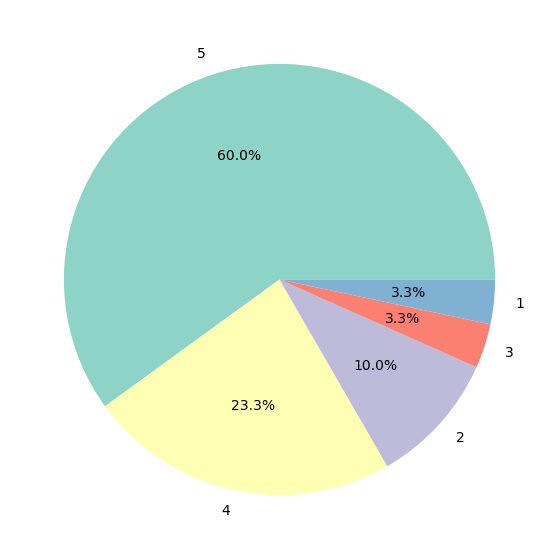

In [6]:
# Creating plot of ratings

data = ove_df['Rating'].value_counts()
labels = ove_df['Rating'].value_counts().keys()

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels, autopct="%1.1f%%", colors=sns.color_palette("Set3"))
 
# show plot
plt.show()

In [7]:
import time

# define a new function to get single page data
def singe_page(d):
    row = d.find_all(class_ = 'ReviewCard')
    # get the value of 'name', 'date', 'review', 'like'
    name = row.find_all(class_ = 'ReviewerProfile__name').text.strip()
    date = row.find_all(class_ ='Text Text__body3').text
    review = row.find_all(class_ = 'ReviewText').text.strip()
    like = row.find_all(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
    
    # get the value of 'rating', [progressing NA value]
    rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
    #rating = []
    #for i in range(len(review_state)):
    #    if 'rated it' in review_state[i].get_text():
    #        rate_i = review_state[i].find_all('span', class_='staticStars notranslate')[0].get_text()
    #        rating.append(rate_i)
    #    else:
    #        rating.append(None)
    
    # extract text from data
    name = list(map(lambda x: x.get_text(), name))
    date = list(map(lambda x: x.get_text(), date))
    review = list(map(lambda x: x.get_text(), review))
    like = list(map(lambda x: x.get_text(), like))
    
    # define a dataframe of different variables
    reviews = pd.DataFrame({'name':name, 'rating':rating, 'date':date, 'review':review, 'like':like})
    
    # clean data
    #reviews.like = reviews['like'].str.extract('(\d+)')
    #reviews['review'] = reviews['review'].apply(lambda x:x.replace('\n', ''))
    
    return reviews

In [8]:
def scrape(soup):
    reviews = []
    for row in soup.find_all(class_ = 'ReviewCard'):
        rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
        review_text = row.find(class_ = 'ReviewText').text.strip()
        date = row.find(class_ ='Text Text__body3').text
        username = row.find(class_ = 'ReviewerProfile__name').text.strip()
        likes = row.find(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
        book = {
        "Text": review_text,
        "Rating": rating,
        "Date" : date,
        "Username": username,
        "Likes": likes}
        reviews.append(book)
    return reviews

In [9]:
# transformers 

from transformers import pipeline

**Sentiment Analysis**

Sentiment Analysis is used to classify whether the topic of a piece of text is negative or positive

In [10]:
text = ove_df.Text[16]

In [11]:
classifier = pipeline('sentiment-analysis')
outputs = classifier(text)
pd.DataFrame.from_records(outputs)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
0,POSITIVE,0.935445


**Named Entity Recognition (NEW)**

NER is the process of extracting named entities (names of products/places/people) from the text.

In [12]:
ner_tagger = pipeline("ner", aggregation_strategy = "simple")
outputs = ner_tagger(text)
pd.DataFrame.from_records(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,MISC,0.964984,A Man Called,21,33
1,PER,0.932222,Ove,34,37
2,MISC,0.626963,Oves,313,317
3,PER,0.990989,Ove,370,373
4,PER,0.991684,Sonja,410,415
5,PER,0.990127,Ove,451,454
6,PER,0.988179,Ove,653,656
7,PER,0.998416,Jimmy,962,967
8,PER,0.997620,Jimmy,969,974
9,PER,0.997542,Fredrik Backman,1298,1313


ORG = Organiation
LOC = Location
Per = Person
MISC = Miscellaneous

The scores tell us how confident the model was about the entity.
The start and end integers represent the character indices where the answer span is found.

In [13]:
text

"When I began reading A Man Called Ove, I thought what a clever tale of an angry old man. The kind that believes rules and regulations are of utmost importance, that see the world filled with stupid people, and is always right. The way the author describes him and his actions are hilarious, as I have known a few Oves myself. They have their principles! The only person Ove had and loved dearly, was his wife, Sonja. She has just passed away, and all Ove wants to do is kill himself, but those pesky neighbors keep getting in his way!I was enjoying all the fun until about the 40% mark, then I started getting angry myself. It is always others who make Ove begrudgingly do the right thing. It was always his wife who made all the excuses for him as a basically non-functioning adult.There were two items in particular that I really didn't like. The first was his cat, a stray, whom if not for his neighbors he would have let die. The second is a neighbor called Jimmy. Jimmy is overweight, and the c

**Question Answering**

In [14]:
reader = pipeline('question-answering')
question = "Who is Ove?"
outputs = reader(question=question, context=text)
pd.DataFrame.from_records([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.075425,1366,1377,good writer


**Summarisation**

The goal of text summarisation is to take long text as input and generate a short version.

In [15]:
summariser = pipeline('summarization')
outputs = summariser(text, clean_up_tokenization_spaces = True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 A Man Called Ove is a clever tale of an angry old man. The only person Ove had and loved dearly, was his wife, Sonja. She has just passed away, and all Ove wants to do is kill himself, but those pesky neighbors keep getting in his way! The author, Fredrik Backman, is a blogger, and this is his first novel.


**Translation**

In [16]:
translator = pipeline("translation_en_to_de", model = "Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces = True)
print(outputs[0]['translation_text'])

/opt/conda/lib/python3.7/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Als ich anfing, A Man Called Ove zu lesen, dachte ich, was für eine kluge Geschichte von einem wütenden alten Mann. Die Art, die Regeln und Vorschriften glauben, sind von größter Bedeutung, die die Welt mit dummen Menschen gefüllt sehen, und ist immer richtig. Die Art, wie der Autor beschreibt ihn und seine Handlungen sind urkomisch, wie ich ein paar Oves selbst gekannt habe. Sie haben ihre Grundsätze! Die einzige Person Ove hatte und liebte innig, war seine Frau, Sonja. Sie ist gerade verstorben, und alles, was Ove will, ist töten, aber diese lästigen Nachbarn immer in seinem Weg!Ich habe den ganzen Spaß, bis über die 40% Marke, dann begann ich wütend mich. Es ist immer andere, die Ove widerwillig tun das Richtige. Es war immer seine Frau, die alle Ausreden für ihn als im Grunde nicht funktionierende Erwachsener gemacht.Es gab zwei Dinge, die ich besonders nicht mochte.


**Text Generation**

In [17]:
from transformers import set_seed
set_seed(100)

generator = pipeline('text-generation')
response = "I am also confused about Ove."
prompt = text + "\n\nResponse:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


/opt/conda/lib/python3.7/site-packages/transformers/generation/utils.py:1187: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  "You have modified the pretrained model configuration to control generation. This is a"
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 357, but `max_length` is set to 200. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


When I began reading A Man Called Ove, I thought what a clever tale of an angry old man. The kind that believes rules and regulations are of utmost importance, that see the world filled with stupid people, and is always right. The way the author describes him and his actions are hilarious, as I have known a few Oves myself. They have their principles! The only person Ove had and loved dearly, was his wife, Sonja. She has just passed away, and all Ove wants to do is kill himself, but those pesky neighbors keep getting in his way!I was enjoying all the fun until about the 40% mark, then I started getting angry myself. It is always others who make Ove begrudgingly do the right thing. It was always his wife who made all the excuses for him as a basically non-functioning adult.There were two items in particular that I really didn't like. The first was his cat, a stray, whom if not for his neighbors he would have let die. The second is a neighbor called Jimmy. Jimmy is overweight, and the co

??? not very good